In [1]:
# ingest the data


import pandas as pd



In [2]:
data=pd.read_csv(r"C:\\fsdmendtoend\\notebooks\\data\\diamond.csv.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [5]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
21089,21090,0.42,Very Good,G,SI1,62.9,54.0,4.79,4.81,3.02,737
23055,23056,0.33,Premium,H,IF,62.0,58.0,4.39,4.42,2.73,868
24473,24474,0.54,Premium,E,VVS2,61.0,59.0,5.28,5.27,3.22,2313
26901,26902,1.15,Ideal,I,VS2,61.7,59.0,6.68,6.73,4.14,5038
18438,18439,1.51,Ideal,J,SI1,61.4,57.0,7.38,7.43,4.55,8049


In [6]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
data["depth"].fillna(data["depth"].mean(),inplace=True)

In [8]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [10]:
data=data.drop(labels=["Unnamed: 0"],axis=1)

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [12]:
data.duplicated().sum()

34

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(26933, 10)

In [16]:
# cat vs num

In [17]:
categorical_columns=data.columns[data.dtypes=="object"]

In [18]:
numerical_columns=data.columns[data.dtypes!="object"]

In [19]:
data[categorical_columns].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [20]:
data[categorical_columns]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [21]:
data[categorical_columns].value_counts()

cut    color  clarity
Ideal  E      VS2        549
       G      VS1        475
              VS2        468
       F      VS2        443
       D      VS2        439
                        ... 
Fair   D      VVS1         1
Good   H      IF           1
       I      IF           1
       J      VVS1         1
Fair   D      I1           1
Name: count, Length: 275, dtype: int64

In [22]:
data[categorical_columns]["cut"].value_counts()

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64

In [23]:
data[categorical_columns]["color"].value_counts()

color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64

In [24]:
data[categorical_columns]["clarity"].value_counts()

clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: count, dtype: int64

In [25]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.745282,1.393848,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

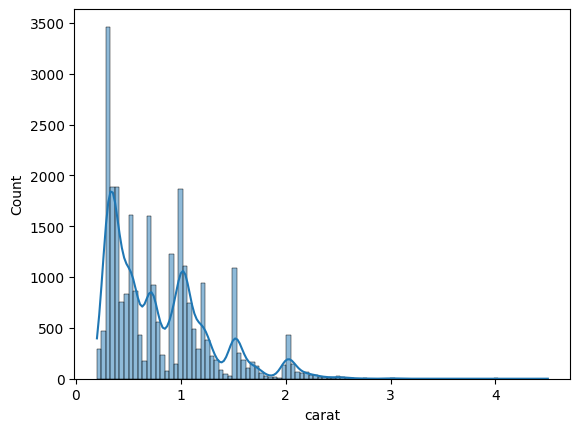

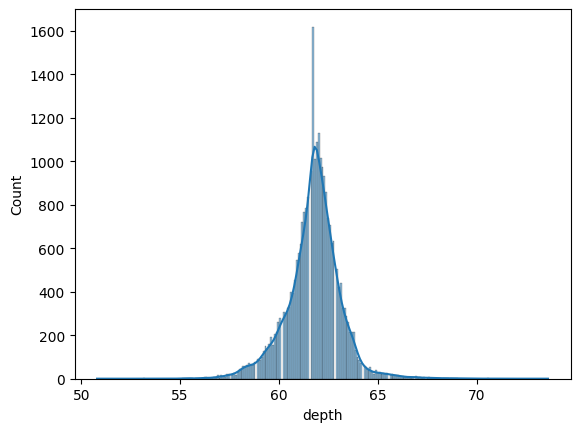

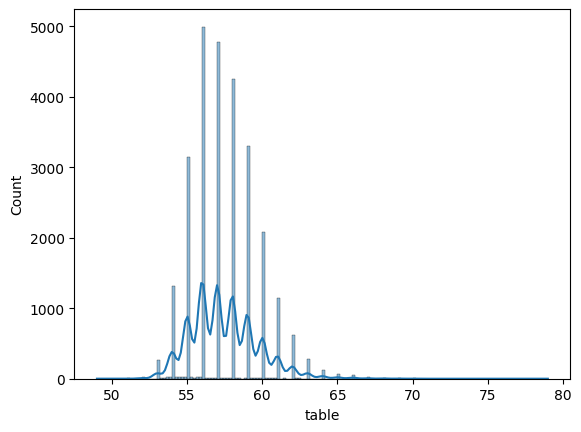

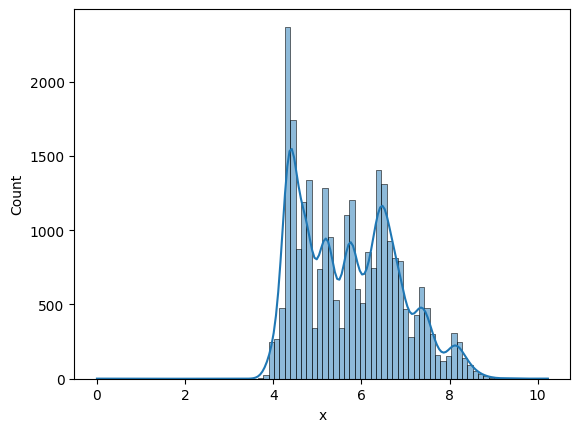

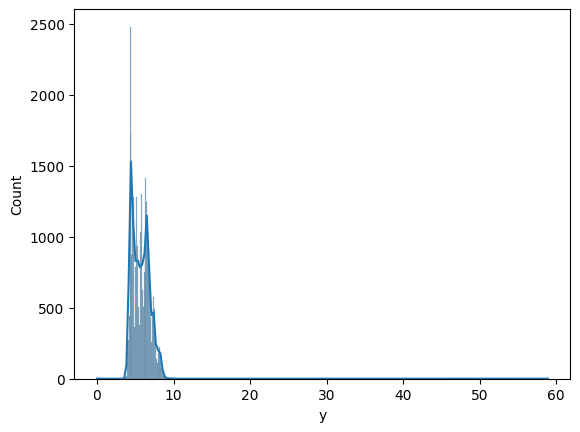

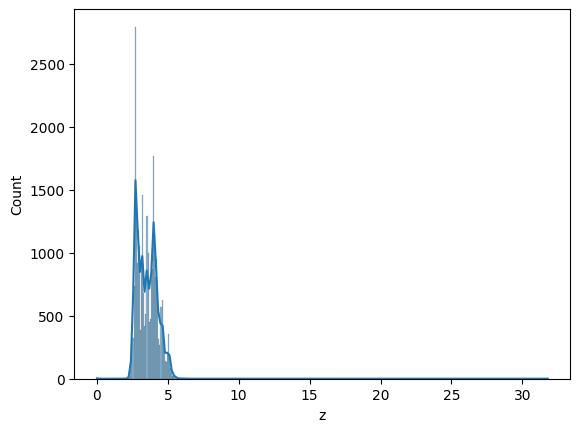

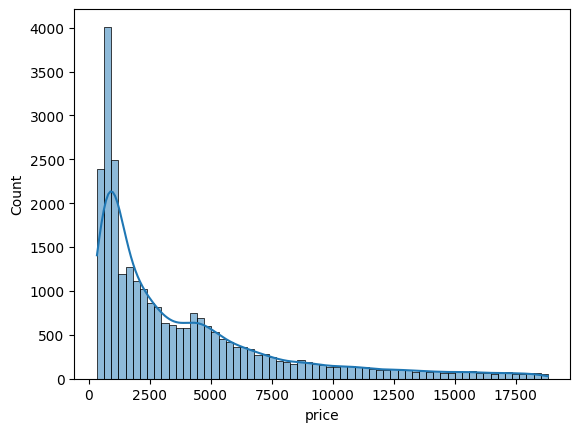

In [27]:
for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

In [29]:
# categorical data

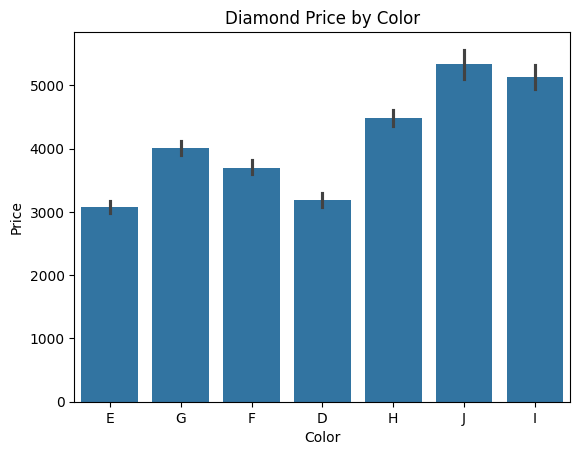

In [35]:
sns.barplot(x="color",y="price",data=data)
plt.title("Diamond Price by Color")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

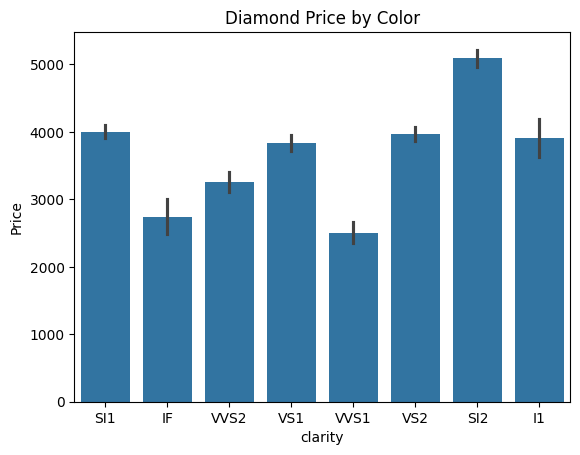

In [37]:
sns.barplot(x="clarity",y="price",data=data)
plt.title("Diamond Price by Color")
plt.xlabel("clarity")
plt.ylabel("Price")
plt.show()

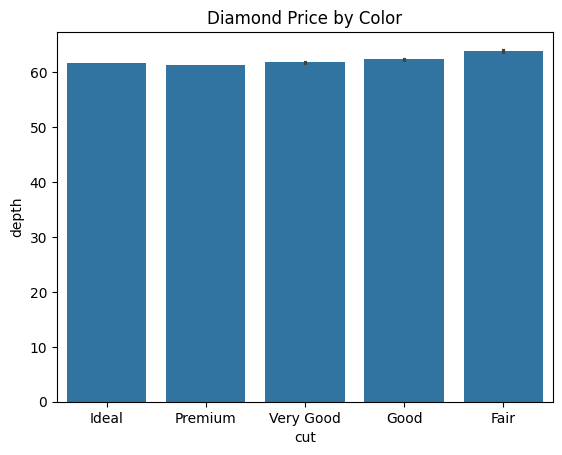

In [47]:
sns.barplot(x="cut",y="depth",data=data)
plt.title("Diamond Price by Color")
plt.xlabel("cut")
plt.ylabel("depth")
plt.show()

In [48]:
data.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


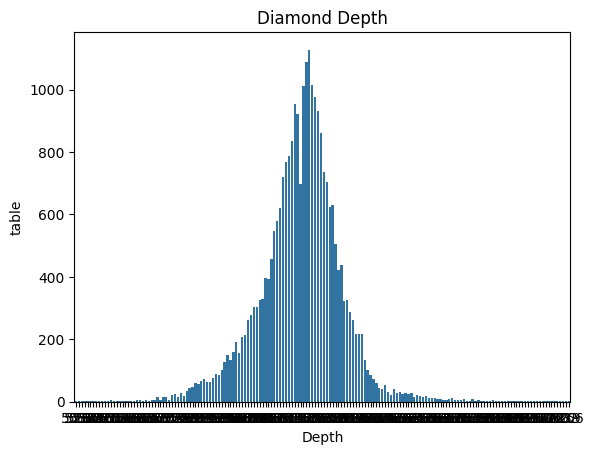

In [49]:
sns.countplot(x="depth",data=data)
plt.title("Diamond Depth")
plt.xlabel("Depth")
plt.ylabel("table")
plt.show()

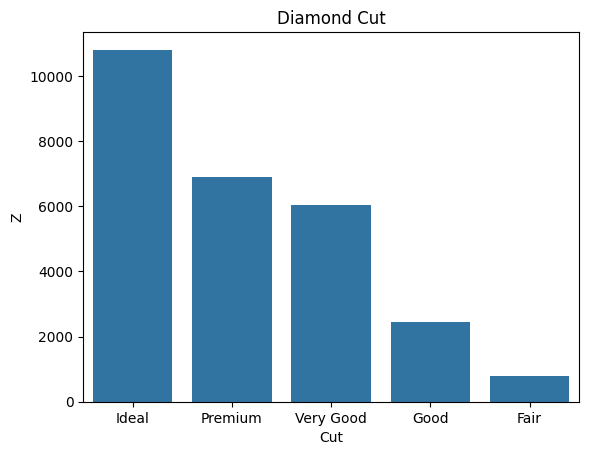

In [52]:
sns.countplot(x="cut",data=data)
plt.title("Diamond Cut")
plt.xlabel("Cut")
plt.ylabel("Z")
plt.show()

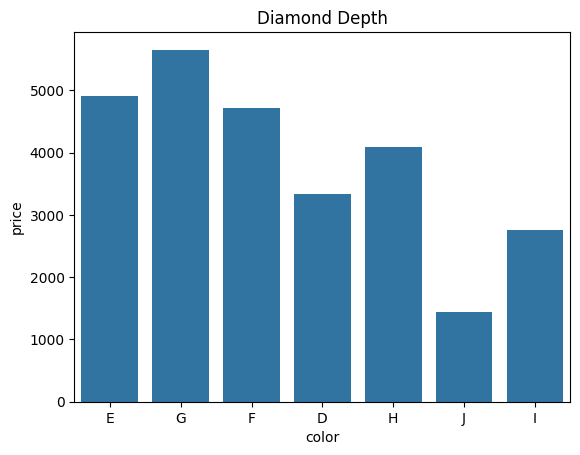

In [46]:
sns.countplot(x="color",data=data)
plt.title("Diamond Depth")
plt.xlabel("color")
plt.ylabel("price")
plt.show()

<Axes: >

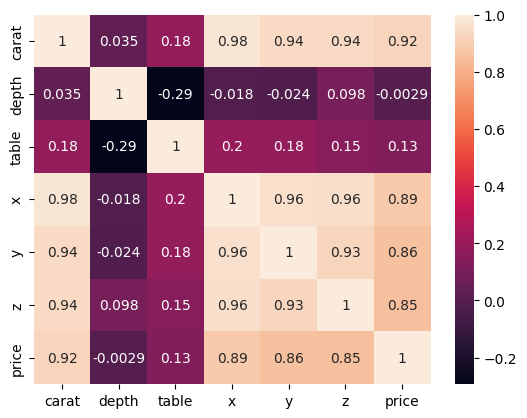

In [28]:
sns.heatmap(data[numerical_columns].corr(),annot=True)